In [105]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve

In [16]:
img = cv2.imread(r"C:\Users\mpstme.student\Documents\I066\SIP\Experiment_7\Fig1016(a)(building_original).tif", 0)

In [28]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Defining Horizontal and vertical masks and adding the result of the two to form a diagonal mask.

In [19]:
Fy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [20]:
Fx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [21]:
Fx

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [25]:
Fy

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [44]:
diagonal = Fx + Fy

In [45]:
diagonal

array([[-2, -2,  0],
       [-2,  0,  2],
       [ 0,  2,  2]])

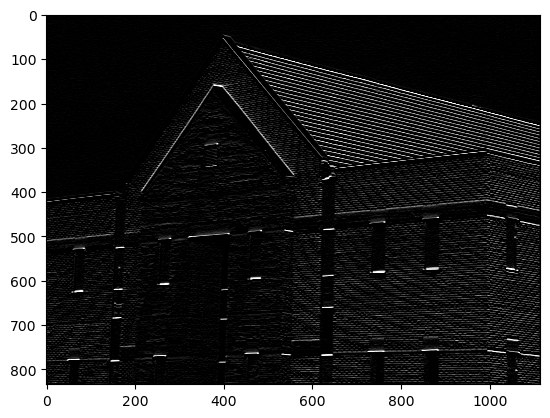

In [95]:
# Horizontal Edge Detection using list slicing:
img_horizontal = np.zeros([m, n])
m, n = img.shape
a = 1

for i in range(a, m - a):
  for j in range(a, n - a):
    temp = img[i - a:i + a + 1, j - a:j + a + 1]
    img_horizontal[i, j] = np.sum(np.multiply(temp, Fx))
    
plt.imshow(img_horizontal, cmap = "gray", vmin = 0, vmax = 255)

In [48]:
# Horizontal Edge Detection by hardcoding the formula:
m, n = img.shape
img_horizontal = img.copy()
for i in range(1, m - 1):
  for j in range(1, n - 1):


    temp = img[i - 1, j - 1] * Fx[0, 0] + img[i - 1, j] * Fx[0, 1] + img[i - 1, j + 1] * Fx[0, 2] + \
    img[i, j - 1] * Fx[1, 0] + img[i, j] * Fx[1, 1] + img[i, j + 1] * Fx[1, 2] + \
    img[i + 1, j - 1] * Fx[2, 0] + img[i + 1, j] * Fx[2, 1] + img[i + 1, j + 1] * Fx[2, 2]
    
    temp = abs(temp)
    img_horizontal[i, j] = temp

    # Using List comprehension:
    # temp = [img[i - 1, j - 1] * mask[0, 0] + img[i - 1, j] * mask[0, 1] + img[i - 1, j + 1] * mask[0, 2] + \
    # img[i, j - 1] * mask[1, 0] + img[i, j] * mask[1, 1] + img[i, j + 1] * mask[1, 2] + \
    # img[i + 1, j - 1] * mask[2, 0] + img[i + 1, j] * mask[2, 1] + img[i + 1, j + 1] * mask[2, 2] for i in range(1, m - 1) for j in range(1, n - 1)]

    

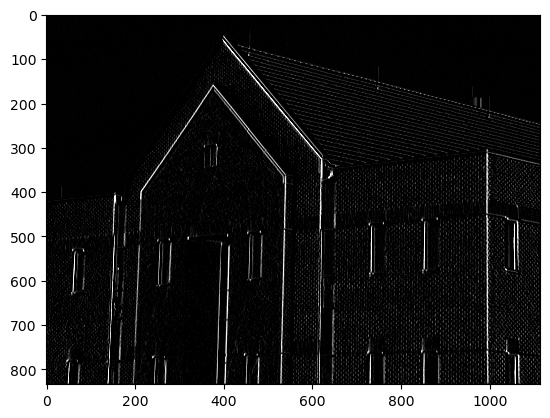

In [96]:
# Vertical Edge Detection using list slicing:
img_vertical = np.zeros([m, n])
m, n = img.shape
a = 1

for i in range(a, m - a):
  for j in range(a, n - a):
    temp = img[i - a:i + a + 1, j - a:j + a + 1]
    img_vertical[i, j] = np.sum(np.multiply(temp, Fy))
    
plt.imshow(img_vertical, cmap = "gray", vmin = 0, vmax = 255)

In [50]:
# Vertical Edge Detection by hardcoding the formula:
m, n = img.shape
img_vertical = img.copy()
for i in range(1, m - 1):
  for j in range(1, n - 1):


    temp = img[i - 1, j - 1] * Fy[0, 0] + img[i - 1, j] * Fy[0, 1] + img[i - 1, j + 1] * Fy[0, 2] + \
    img[i, j - 1] * Fy[1, 0] + img[i, j] * Fy[1, 1] + img[i, j + 1] * Fy[1, 2] + \
    img[i + 1, j - 1] * Fy[2, 0] + img[i + 1, j] * Fy[2, 1] + img[i + 1, j + 1] * Fy[2, 2]
    
    temp = abs(temp)
    img_vertical[i, j] = temp

    # Using List comprehension:
    # temp = [img[i - 1, j - 1] * mask[0, 0] + img[i - 1, j] * mask[0, 1] + img[i - 1, j + 1] * mask[0, 2] + \
    # img[i, j - 1] * mask[1, 0] + img[i, j] * mask[1, 1] + img[i, j + 1] * mask[1, 2] + \
    # img[i + 1, j - 1] * mask[2, 0] + img[i + 1, j] * mask[2, 1] + img[i + 1, j + 1] * mask[2, 2] for i in range(1, m - 1) for j in range(1, n - 1)]

    

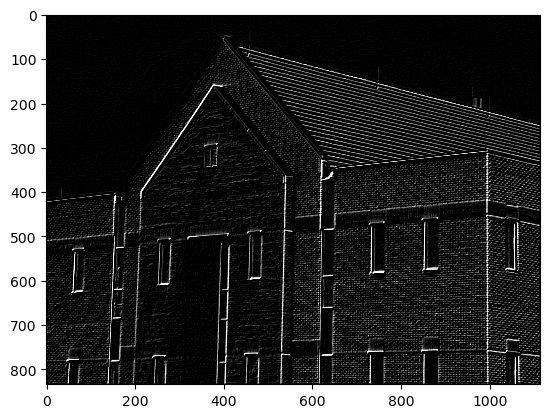

In [97]:
# Diagonal Edge Detection using list slicing:
img_diagonal = np.zeros([m, n])
m, n = img.shape
a = 1

for i in range(a, m - a):
  for j in range(a, n - a):
    temp = img[i - a:i + a + 1, j - a:j + a + 1]
    img_diagonal[i, j] = np.sum(np.multiply(temp, diagonal))
    
plt.imshow(img_diagonal, cmap = "gray", vmin = 0, vmax = 255)

In [52]:
# Diagonal Edge Detection by hardcoding the formula:
m, n = img.shape
img_diagonal = img.copy()
for i in range(1, m - 1):
  for j in range(1, n - 1):


    temp = img[i - 1, j - 1] * diagonal[0, 0] + img[i - 1, j] * diagonal[0, 1] + img[i - 1, j + 1] * diagonal[0, 2] + \
    img[i, j - 1] * diagonal[1, 0] + img[i, j] * diagonal[1, 1] + img[i, j + 1] * diagonal[1, 2] + \
    img[i + 1, j - 1] * diagonal[2, 0] + img[i + 1, j] * diagonal[2, 1] + img[i + 1, j + 1] * diagonal[2, 2]
    
    temp = abs(temp)
    img_diagonal[i, j] = temp

    # Using List comprehension:
    # temp = [img[i - 1, j - 1] * mask[0, 0] + img[i - 1, j] * mask[0, 1] + img[i - 1, j + 1] * mask[0, 2] + \
    # img[i, j - 1] * mask[1, 0] + img[i, j] * mask[1, 1] + img[i, j + 1] * mask[1, 2] + \
    # img[i + 1, j - 1] * mask[2, 0] + img[i + 1, j] * mask[2, 1] + img[i + 1, j + 1] * mask[2, 2] for i in range(1, m - 1) for j in range(1, n - 1)]

    

# Showing the differences of Edge detection using various masks defined above (horizonal, vertical and diagonal).

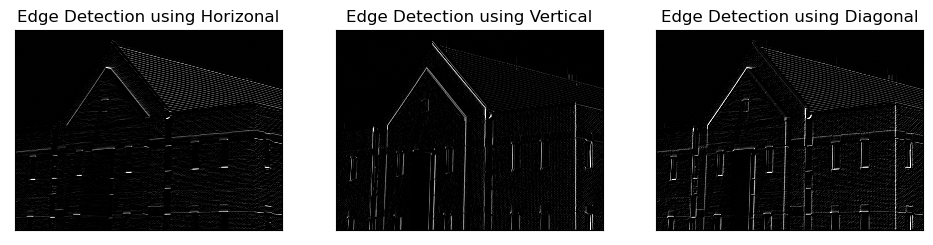

In [98]:
radii = ["Horizonal", "Vertical", "Diagonal"]
images = [img_horizontal, img_vertical, img_diagonal]
plt.figure(figsize = (20, 10))
for i in range(len(radii)):    
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i], cmap = "gray", vmin = 0, vmax = 255)
    plt.title("Edge Detection using {}".format(radii[i]))
    plt.xticks([])
    plt.yticks([])

In [103]:
all_images = img_horizontal + img_vertical + img_diagonal

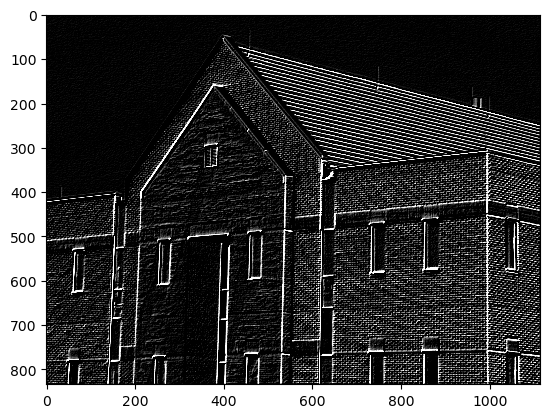

In [104]:
plt.imshow(all_images, cmap = "gray", vmin = 0, vmax = 255)

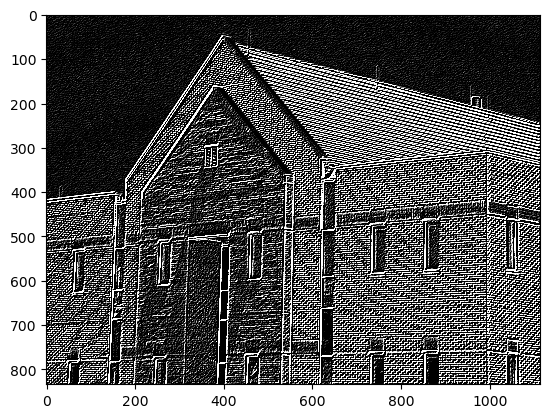

In [115]:
# Built in Function:
signal_x = convolve(img_horizontal, Fx, mode = "same")
signal_y = convolve(img_vertical, Fy, mode = "same")
signal_diagonal = convolve(img_diagonal, diagonal, mode = "same")
plt.imshow(signal_x, cmap = "gray", vmin = 0, vmax = 255)
plt.imshow(signal_y, cmap = "gray", vmin = 0, vmax = 255)
plt.imshow(signal_diagonal, cmap = "gray", vmin = 0, vmax = 255)

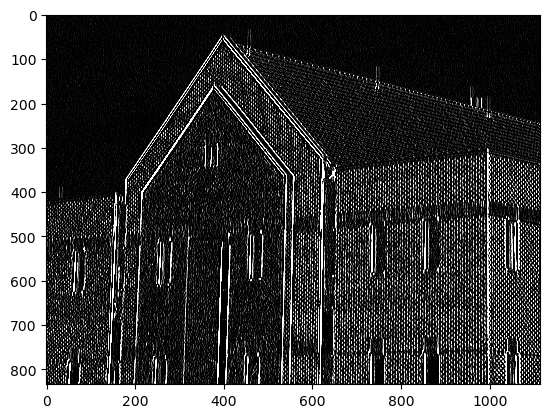

In [116]:

plt.imshow(signal_y, cmap = "gray", vmin = 0, vmax = 255)

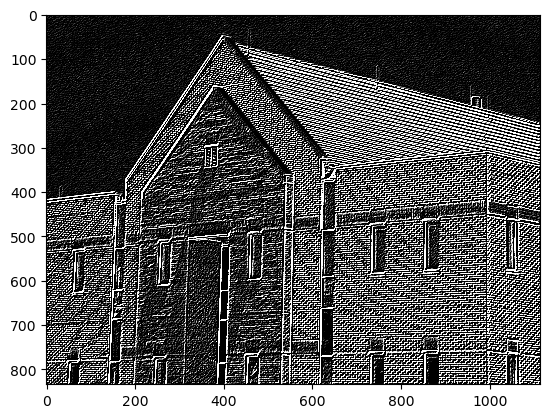

In [117]:

plt.imshow(signal_diagonal, cmap = "gray", vmin = 0, vmax = 255)

Enter the size of the Mask : 5
You have requested for Mask of Size :   5 x 5


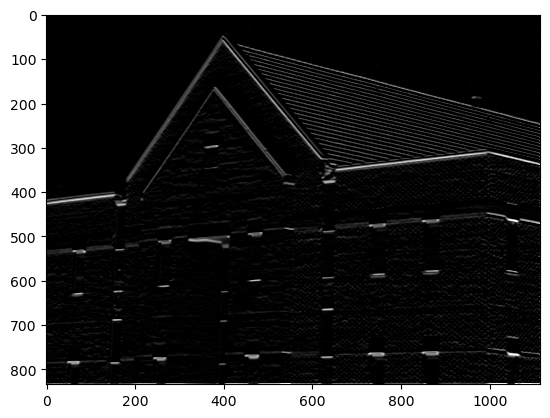

In [119]:
# For different sizes of masks provided from user:
size_of_mask = int(input("Enter the size of the Mask : "))
img_new = img.copy()
m, n = img.shape
print("You have requested for Mask of Size :  ", size_of_mask ,"x", size_of_mask)
a = size_of_mask//2

for i in range(a, m - a):
    for j in range(a, n - a):
        temp = np.sum(img[i - a:i + a + 1, j - a:j + a + 1])
        img_new[i, j] = temp//size_of_mask**2
signal_x = convolve(img_new, Fx, mode = "same")
plt.imshow(signal_x, cmap = "gray", vmin = 0, vmax = 255)

# Conclusion:
## As we see from the image shown above and in the cell where the difference between three types of images are shown (horizontal, vertical and diagonal, we see that the above image where we applied Averaging filter to the original image and then applied convolution seemed to detect the horizontal images better than the one in which Averaging filter wasn't applied.
